# Unidade 02 

- **Aluno**: Carmem Stefanie da Silva Cavalcante



**Avisos**

1. Todas as questões devem ser respondidas através de códigos escritos em linguagem Python 3 (**verificar o tipo do runtime**) e no espaço destinado para esse fim. Criem células Markdown para destacar quando inicia e termina as questões. 
2. As bases de dados para resolução das questões estão disponibilizadas no arquivo anexo a prova. **Os dados são provenientes do portal de dados abertos da UFRN.**

1. (**4 pontos**) O arquivo "docentes.csv" contem informações sobre os professores ativos da UFRN. 
- a) (**1 ponto**) Utilizando um gráfico de *pizza*, descreva as prorporções/percentagens dos diferentes tipos de professores encontrados na UFRN (coluna **categoria**). Os valores das proporções/percentagens devem estar claramente descritos na figura. O rótulo (*label*) do eito y não deverá ser apresentado na respectiva figura. Quais as suas conclusões?
- b) (**1 ponto**) Utizando um gráfico de *barras* descreva a proporção das diferentes formações dos professores na UFRN (coluna **formacao**). Quais as suas conclusões?
- c) (**1 ponto**) Considerando apenas os professores lotados no *Instituto Metrópole Digital* e as mesmas variáveis descritas nas questões **1.a** e **1.b**, pode-se concluir que existe um comportamento semelhante ao generalizado pela UFRN? Justifique a sua resposta utilizando os mesmos gráficos adotados nas questões **1.a** e **1.b**. As duas figuras geradas devem estar uma lado da outra.
- d) (**1 ponto**) Utilizando um gráfico de *histograma* (com 30 barras/bins) sobre as informações de admissão (coluna **admissao**) dos professores, qual período houve um maior número de contratações na instituição? Crie um segundo gráfico de histograma mas dessa vez fazendo a mesma análise apenas para o *Instituto Metrópole Digital*. Os dois gráficos devem estar um ao lado do outro. Justifque a sua resposta.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
professores = pd.read_csv("docentes.csv",sep=";").drop("Unnamed: 11",axis=1)
professores["admissao"] = pd.to_datetime(professores.admissao).dt.year


In [0]:
#1
professores["categoria"].value_counts().plot.pie(figsize = (6,6), autopct = '%.2f%%')
plt.ylabel('')

#Há uma predominância de Professores do Magistério Superior,
#enquanto acontece uma quase inexistência de Professores de Ensino Básico de Ex-território (menos de 1%)

In [0]:
#2

professores["formacao"].value_counts().plot.barh()
plt.xlabel("Quantidade de docentes com essa formação")

#Não existe quantidade significativa de docentes na UFRN que tenha apenas graduação, 
#quase todos possuem Pós Graduação (seja stricto ou lato) e a grande maioria tem doutorado.

In [0]:
#3.a

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

prof_imd = professores[professores["lotacao"] == "INSTITUTO METROPOLE DIGITAL"]

labels = professores["categoria"].value_counts().index

ax1.pie(professores["categoria"].value_counts(), autopct = '%.2f%%', labels=labels)
ax2.pie(prof_imd["categoria"].value_counts(), autopct = '%.2f%%')

ax1.set_title("Toda a UFRN")
ax2.set_title("IMD")

plt.show()

#É possível reparar que o comportamento dos gráficos é similar: tanto considerando os professores
# de toda a UFRN, como analisando apenas os do IMD, prevalecem os Professores do Magistério Superior



In [0]:
#3.b

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



num_cols = ['DOUTORADO', 'MESTRADO', 'ESPECIALIZAÇÃO', 'GRADUAÇÃO', 'DESCONHECIDA']

width_prof = professores[num_cols]
width_prof_imd = prof_imd[num_cols].iloc[0]

bar_positions = np.arange(5) + 0.75

ax1.barh(bar_positions, width_prof, 0.5)
ax2.barh(bar_positions, width_prof_imd, 0.5)

ax1.set_title("Toda a UFRN")
ax2.set_title("IMD")

plt.show()


In [0]:
#3.b

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1 = professores["formacao"].value_counts().plot.bar(rot = 45, title="Toda a UFRN")
ax2 = prof_imd["formacao"].value_counts().plot.bar(rot = 45, title="IMD")


plt.show()



In [0]:
#3.b
prof_imd["formacao"].value_counts().plot.bar(rot = 45, title="IMD")

#A proporção se mantém: a grande maioria dos docentes do IMD tem doutorado, como foi
#mostrado que acontecia com os docentes da UFRN.

2. (**3 pontos**) O arquivo "alunos_imd.csv" contem informações sobre os discentes do curso de Bacharelado em Tecnologia da Informação desde 2013. 
- a) (**2 pontos**) A base de dados em questão traz várias informações interessantes, dentre elas o gênero dos discentes (coluna **sexo**). Nessa perspectiva, atualmente existem vários projetos que estimulam a inserção de mulheres na carreira de computação, como por exemplo o **Projeto PyLadies**, **Mulheres na TI**, dentre outros. Utilizando a biblioteca Seaborn crie um gráfico de barras onde seja possível verificar a evolução da inserção de mulheres no curso de Bacharelado em Tecnologia da Informação da UFRN ao longo dos anos.
- b) **(0.5 ponto**) Baseado em **2.a**, qual o ano que houve um maior número de ingressantes mulheres? Existe uma tendência de crescimento acentuado no número de ingressantes mulheres?
- c) **(0.5 ponto**) Quando considerado apenas os discentes com status "CONCLUÍDO", como se apresenta a questão da diferença de genêro? Utilize o mesmo tipo de gráfico da questão **2.a** para justificar a sua resposta.

In [0]:
import seaborn as sns
alunos_imd = pd.read_csv("alunos_imd.csv").iloc[:,1:]
alunos_imd.head()
# coloque as suas respostas aqui

In [0]:
#a
sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = alunos_imd)


In [0]:
#b

mulheres = alunos_imd[alunos_imd["sexo"] == "F"]
mulheres["ano_ingresso"].value_counts()

#O ano com maior número de mulheres ingressantes foi 2018.Porém, não existe um 
#crescimento significativo do número de mulheres em TI, de forma que a quantidade
#de ingressantes do sexo feminino em 2013 chegou a ser maior que a de 2019

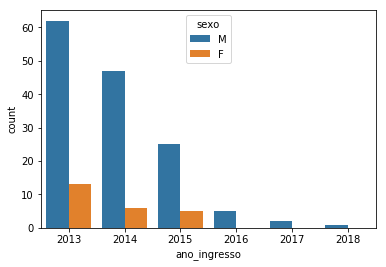

In [0]:
#c 

concluidos = alunos_imd[alunos_imd["status"] == "CONCLUÍDO"]
sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = concluidos)

#A questão de gênero de mantém: existem menos mulheres formadas do que homens e não há crescimento.

3. (**3 pontos**) O arquivo "alunos_imd.csv" contem informações sobre os discentes do curso de Bacharelado em Tecnologia da Informação desde 2013. Outra informação bastante importante e presente na base de dados está relacionada com a etnia (coluna **raca**) dos discentes. Diferentes proporções de etnias são encontradas na base de dados. Estudos estatísticos devem levar em consideração tais informações na tentativa de evitar enviesamentos. Utilizando o conteúdo apresentado em sala de aula, descreva através de gráfico(s) a importância no tamanho da amostra de dados para um estudo estatístico. Discorra também sobre os resultados. Utilize como base a proporção de etnias diferentes de "pardo" e "branco" assim como o tamanho de amostras de 100, 250, 500 e 1500 com 100 simulações para cada tamanho e sementes (*random_state*) aleatórias apropriadas que permitam a reproducibilidade dos resultados.



In [0]:
alunos_imd = pd.read_csv("alunos_imd.csv").iloc[:,1:]
etnias1 = alunos_imd[alunos_imd["raca"] != "Pardo"]
etnias = etnias1[etnias1["raca"] != "Branco"]

prop_etnias = alunos_imd["raca"].value_counts(normalize=True)*100)
print(prop_etnias)

#Cerca de 5% dos alunos da faculdade são negros, 
#0.3% Amarelos, 0.2% Indigenos e 0.04% Remanescentes de quilombo

{'Não Informado': 6.46900269541779, 'Negro': 5.480682839173405, 'Amarelo (de origem oriental)': 0.3144654088050315, 'Indígeno': 0.2695417789757413, 'Remanescente de quilombo': 0.04492362982929021}
Pardo                           46.451033
Branco                          40.970350
Não Informado                    6.469003
Negro                            5.480683
Amarelo (de origem oriental)     0.314465
Indígeno                         0.269542
Remanescente de quilombo         0.044924
Name: raca, dtype: float64


In [0]:

quant = [100, 250, 500,1500]
j = 0
points = []

for q in quant:
  for i in range (1,100):
    sample = alunos_imd.sample(q, random_state = i).mean()
    points.append(sample)
    j+= 1

  plt.scatter(range(0, 100), points)
  plt.show()
  
##acabou o tempo bem quando eu comecei aqui